In [ ]:
# default_exp gbe.wm.reliability

# Working memory task - Reliability

<div>
    <p align="left"><img src="images/wm_task.png" width = '200px'> 

    
   
    
</div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from trr265 import plotting
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.wm.data_provider import WMDataProvider
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.stats as stats
import pandas as pd

## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data(update=True)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
#df = df.query("is_initial and is_baseline")
print(len(df.participant.unique()))

df = df.query("is_baseline==True")
# Filtering participants with old app
print(len(df.participant.unique()))
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)

Preparing wm_data
513
483
8 participants used an old version of the task in some of their sessions.  13 sessions (1.45%) were removed from the dataset.
11 sessions (1.25%) were removed because participants failed a level two trial.


## Test-retest reliability

### Based on maximum WMC level

#### No distractor (long)

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.355,2.1,397.0,398.0,0.0,0.281,0.425,".35 (.28, .42)"
Single_random_raters,ICC2,0.355,2.1,397.0,397.0,0.0,0.281,0.425,".35 (.28, .42)"
Single_fixed_raters,ICC3,0.355,2.1,397.0,397.0,0.0,0.281,0.425,".35 (.28, .42)"
Average_raters_absolute,ICC1k,0.524,2.1,397.0,398.0,0.0,0.438,0.596,".52 (.44, .60)"
Average_random_raters,ICC2k,0.524,2.1,397.0,397.0,0.0,0.438,0.596,".52 (.44, .60)"
Average_fixed_raters,ICC3k,0.524,2.1,397.0,397.0,0.0,0.438,0.596,".52 (.44, .60)"


,variance,Percent
ID,0.385,0.355
Items,0.000,0.000
Residual,0.700,0.645
Total,1.085,1.000


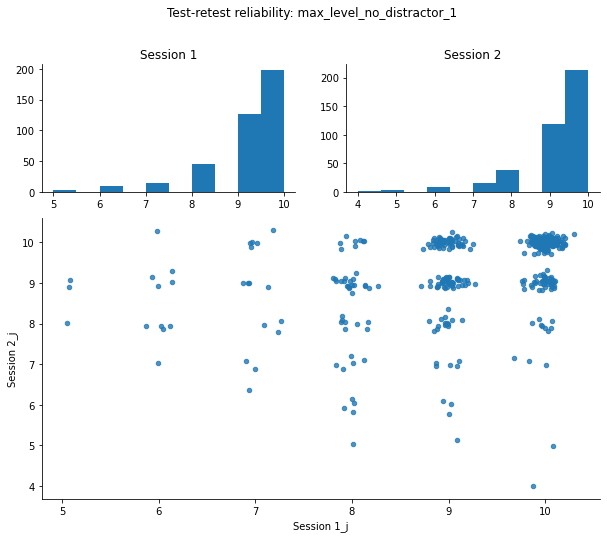

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_1', add_jitter = True)

#### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.421,2.454,397.0,398.0,0.0,0.351,0.487,".42 (.35, .49)"
Single_random_raters,ICC2,0.421,2.454,397.0,397.0,0.0,0.351,0.487,".42 (.35, .49)"
Single_fixed_raters,ICC3,0.421,2.454,397.0,397.0,0.0,0.351,0.487,".42 (.35, .49)"
Average_raters_absolute,ICC1k,0.593,2.454,397.0,398.0,0.0,0.519,0.655,".59 (.52, .65)"
Average_random_raters,ICC2k,0.593,2.454,397.0,397.0,0.0,0.519,0.655,".59 (.52, .65)"
Average_fixed_raters,ICC3k,0.593,2.454,397.0,397.0,0.0,0.519,0.655,".59 (.52, .65)"


,variance,Percent
ID,0.601,0.421
Items,0.000,0.000
Residual,0.827,0.579
Total,1.428,1.000


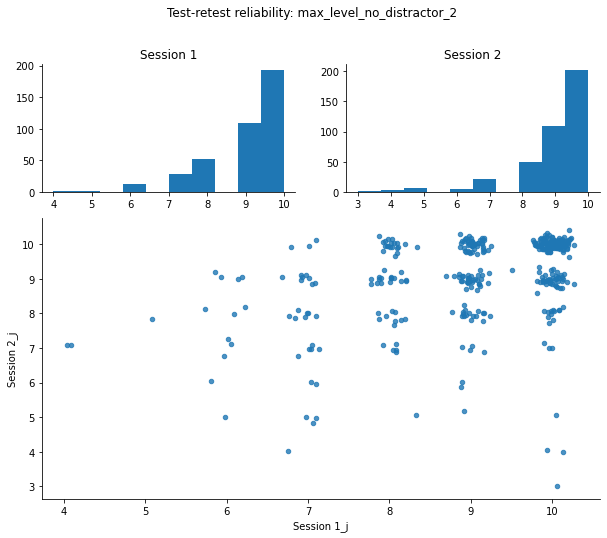

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_2', add_jitter = True)

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.338,2.019,397.0,398.0,0.0,0.262,0.409,".34 (.26, .41)"
Single_random_raters,ICC2,0.340,2.045,397.0,397.0,0.0,0.266,0.411,".34 (.27, .41)"
Single_fixed_raters,ICC3,0.343,2.045,397.0,397.0,0.0,0.268,0.414,".34 (.27, .41)"
Average_raters_absolute,ICC1k,0.505,2.019,397.0,398.0,0.0,0.416,0.580,".50 (.42, .58)"
Average_random_raters,ICC2k,0.508,2.045,397.0,397.0,0.0,0.420,0.583,".51 (.42, .58)"
Average_fixed_raters,ICC3k,0.511,2.045,397.0,397.0,0.0,0.423,0.586,".51 (.42, .59)"


,variance,Percent
ID,0.459,0.340
Items,0.012,0.009
Residual,0.878,0.651
Total,1.348,1.000


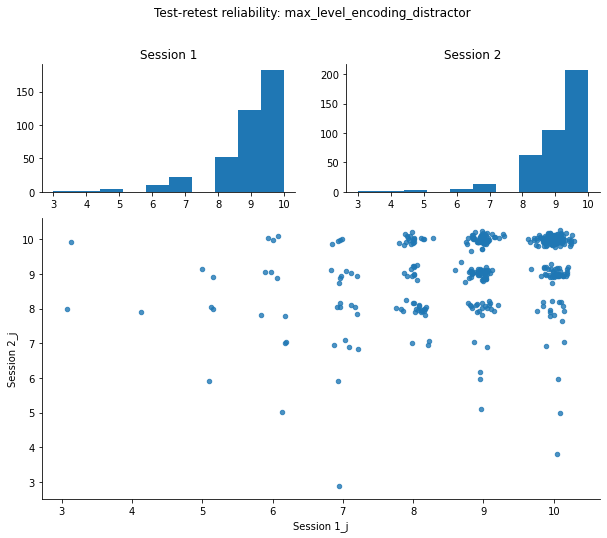

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_encoding_distractor = stats.analyze_reliability(_df, dependent = 'max_level_encoding_distractor', add_jitter = True)

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.430,2.511,397.0,398.0,0.0,0.361,0.495,".43 (.36, .50)"
Single_random_raters,ICC2,0.436,2.595,397.0,397.0,0.0,0.365,0.501,".44 (.36, .50)"
Single_fixed_raters,ICC3,0.444,2.595,397.0,397.0,0.0,0.375,0.508,".44 (.37, .51)"
Average_raters_absolute,ICC1k,0.602,2.511,397.0,398.0,0.0,0.530,0.662,".60 (.53, .66)"
Average_random_raters,ICC2k,0.607,2.595,397.0,397.0,0.0,0.534,0.668,".61 (.53, .67)"
Average_fixed_raters,ICC3k,0.615,2.595,397.0,397.0,0.0,0.545,0.673,".61 (.55, .67)"


,variance,Percent
ID,0.875,0.436
Items,0.037,0.018
Residual,1.096,0.546
Total,2.008,1.000


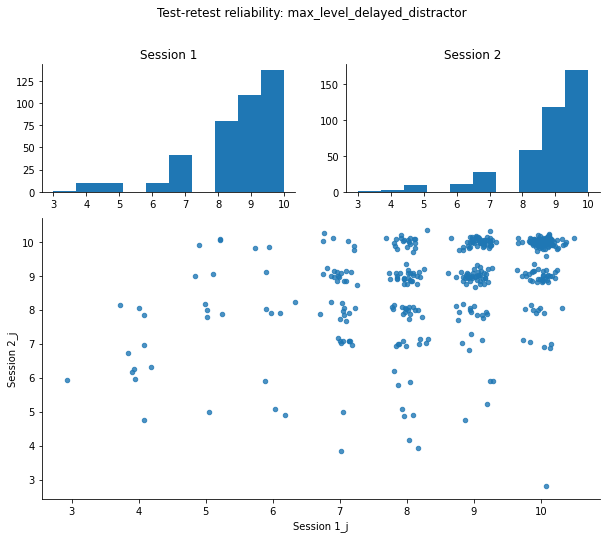

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_delayed_distractor = stats.analyze_reliability(_df, dependent = 'max_level_delayed_distractor', add_jitter = True)

### Based on predicted values (separate models)

#### No distractor (long)

In [ ]:
_df = wm_scoring.get_perc_correct_predicted_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: Lade nötiges Paket: lme4

R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘lmerTest’


R[write to console]: Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    step




,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.407,2.375,397.0,398.0,0.0,0.336,0.474,".41 (.34, .47)"
Single_random_raters,ICC2,0.408,2.378,397.0,397.0,0.0,0.337,0.474,".41 (.34, .47)"
Single_fixed_raters,ICC3,0.408,2.378,397.0,397.0,0.0,0.337,0.474,".41 (.34, .47)"
Average_raters_absolute,ICC1k,0.579,2.375,397.0,398.0,0.0,0.503,0.643,".58 (.50, .64)"
Average_random_raters,ICC2k,0.579,2.378,397.0,397.0,0.0,0.504,0.643,".58 (.50, .64)"
Average_fixed_raters,ICC3k,0.579,2.378,397.0,397.0,0.0,0.504,0.644,".58 (.50, .64)"


,variance,Percent
ID,0.006,0.408
Items,0.000,0.001
Residual,0.009,0.592
Total,0.016,1.000


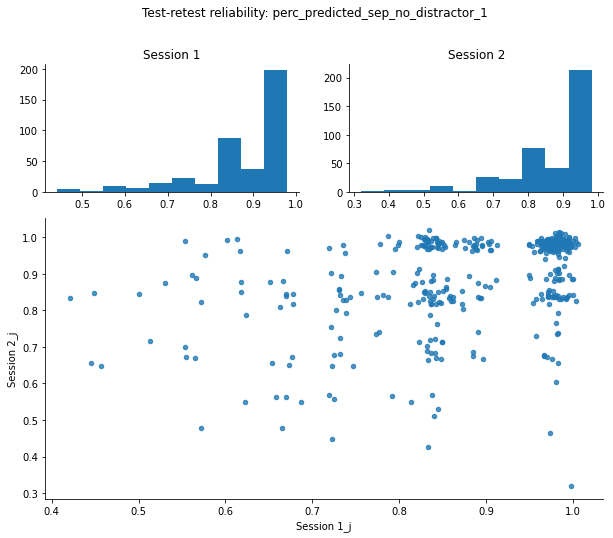

In [ ]:
iccs_perc_predicted_sep_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_no_distractor_1', add_jitter = True)

#### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.436,2.545,397.0,398.0,0.0,0.367,0.500,".44 (.37, .50)"
Single_random_raters,ICC2,0.436,2.545,397.0,397.0,0.0,0.367,0.500,".44 (.37, .50)"
Single_fixed_raters,ICC3,0.436,2.545,397.0,397.0,0.0,0.366,0.500,".44 (.37, .50)"
Average_raters_absolute,ICC1k,0.607,2.545,397.0,398.0,0.0,0.536,0.667,".61 (.54, .67)"
Average_random_raters,ICC2k,0.607,2.545,397.0,397.0,0.0,0.536,0.667,".61 (.54, .67)"
Average_fixed_raters,ICC3k,0.607,2.545,397.0,397.0,0.0,0.536,0.667,".61 (.54, .67)"


,variance,Percent
ID,0.009,0.436
Items,0.000,0.000
Residual,0.012,0.564
Total,0.021,1.000


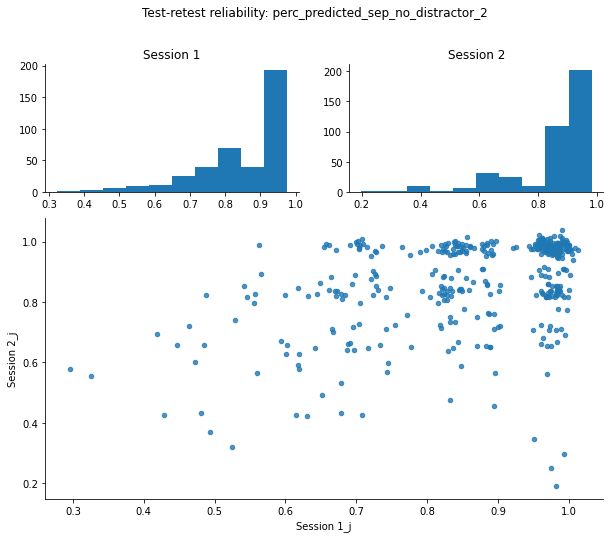

In [ ]:
iccs_perc_predicted_sep_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_no_distractor_2', add_jitter = True)

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.350,2.077,397.0,398.0,0.0,0.276,0.420,".35 (.28, .42)"
Single_random_raters,ICC2,0.353,2.111,397.0,397.0,0.0,0.279,0.423,".35 (.28, .42)"
Single_fixed_raters,ICC3,0.357,2.111,397.0,397.0,0.0,0.283,0.427,".36 (.28, .43)"
Average_raters_absolute,ICC1k,0.519,2.077,397.0,398.0,0.0,0.432,0.592,".52 (.43, .59)"
Average_random_raters,ICC2k,0.522,2.111,397.0,397.0,0.0,0.437,0.595,".52 (.44, .59)"
Average_fixed_raters,ICC3k,0.526,2.111,397.0,397.0,0.0,0.441,0.599,".53 (.44, .60)"


,variance,Percent
ID,0.007,0.353
Items,0.000,0.011
Residual,0.012,0.636
Total,0.020,1.000


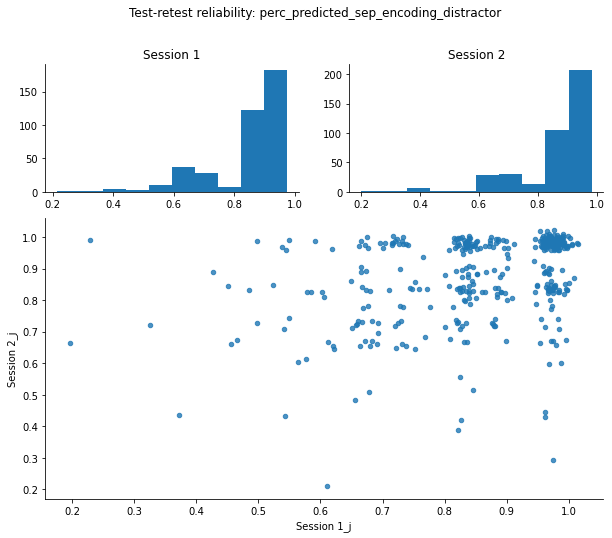

In [ ]:
perc_predicted_sep_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_encoding_distractor', add_jitter = True)

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.462,2.720,397.0,398.0,0.0,0.395,0.525,".46 (.39, .52)"
Single_random_raters,ICC2,0.469,2.851,397.0,397.0,0.0,0.397,0.534,".47 (.40, .53)"
Single_fixed_raters,ICC3,0.481,2.851,397.0,397.0,0.0,0.415,0.542,".48 (.41, .54)"
Average_raters_absolute,ICC1k,0.632,2.720,397.0,398.0,0.0,0.566,0.688,".63 (.57, .69)"
Average_random_raters,ICC2k,0.638,2.851,397.0,397.0,0.0,0.569,0.696,".64 (.57, .70)"
Average_fixed_raters,ICC3k,0.649,2.851,397.0,397.0,0.0,0.586,0.703,".65 (.59, .70)"


,variance,Percent
ID,0.013,0.469
Items,0.001,0.024
Residual,0.014,0.507
Total,0.027,1.000


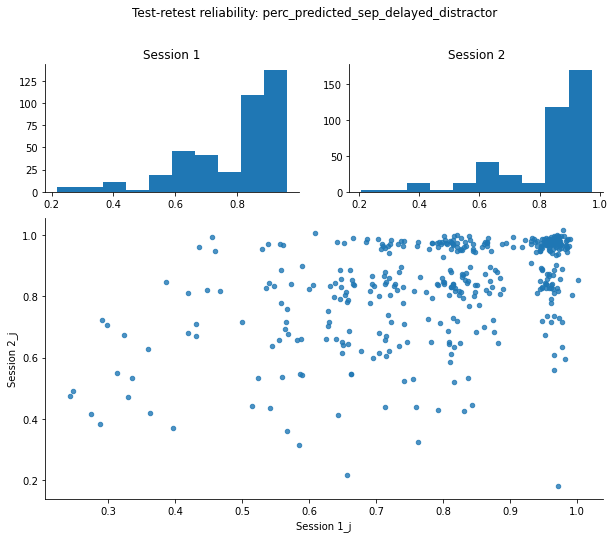

In [ ]:
perc_predicted_sep_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_delayed_distractor', add_jitter = True)

### Based on predicted values (joint model)

#### No distractor (long)

In [ ]:
_df, ms = wm_scoring.get_perc_correct_predicted_sep_trial(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.601,4.01,397.0,398.0,0.0,0.545,0.651,".60 (.55, .65)"
Single_random_raters,ICC2,0.601,4.01,397.0,397.0,0.0,0.545,0.651,".60 (.55, .65)"
Single_fixed_raters,ICC3,0.601,4.01,397.0,397.0,0.0,0.545,0.651,".60 (.55, .65)"
Average_raters_absolute,ICC1k,0.751,4.01,397.0,398.0,0.0,0.706,0.789,".75 (.71, .79)"
Average_random_raters,ICC2k,0.751,4.01,397.0,397.0,0.0,0.706,0.789,".75 (.71, .79)"
Average_fixed_raters,ICC3k,0.751,4.01,397.0,397.0,0.0,0.706,0.789,".75 (.71, .79)"


,variance,Percent
ID,0.009,0.601
Items,0.000,0.000
Residual,0.006,0.399
Total,0.016,1.000


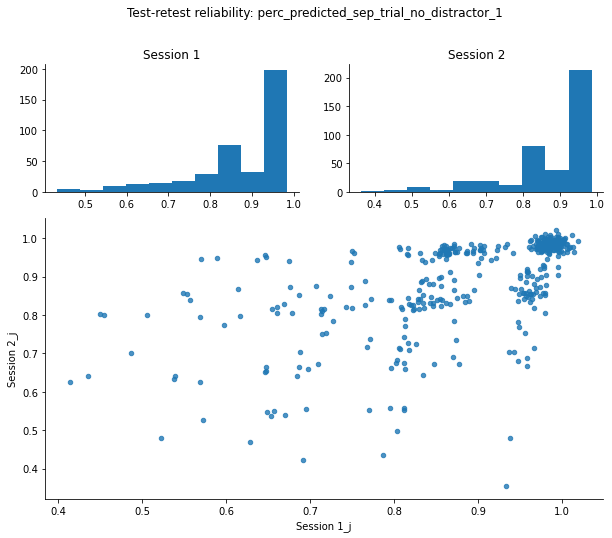

In [ ]:
iccs_perc_predicted_sep_trial_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_no_distractor_1', add_jitter = True)

In [ ]:
def get_model_calculated_icc(m):
    %R require(insight) -i m
    %R var_sess <- get_variance_intercept(m)[1]
    %R var_pp <- get_variance_intercept(m)[2]
    %R icc <- var_pp / (var_pp+(var_sess)) -o icc -o var_sess -o var_pp
    # Note that what get_variance_intercept outputs as session variance, we call residual, here
    variances = pd.DataFrame({"type":["Participant","Session","Residual"],"variance":[var_pp[0],0,var_sess[0]]})
    variances["Percent"] = variances.variance/variances.variance.sum()
    variances = {'iccs':[None, variances]}
    return {'icc':icc[0],'variances':variances}

iccs_perc_predicted_sep_trial_mod_no_distractor_1 = get_model_calculated_icc(ms['no_distractor_1'])
iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']

R[write to console]: Lade nötiges Paket: insight



0.6449762145402308

#### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.587,3.842,397.0,398.0,0.0,0.530,0.639,".59 (.53, .64)"
Single_random_raters,ICC2,0.587,3.842,397.0,397.0,0.0,0.530,0.639,".59 (.53, .64)"
Single_fixed_raters,ICC3,0.587,3.842,397.0,397.0,0.0,0.530,0.639,".59 (.53, .64)"
Average_raters_absolute,ICC1k,0.740,3.842,397.0,398.0,0.0,0.693,0.779,".74 (.69, .78)"
Average_random_raters,ICC2k,0.740,3.842,397.0,397.0,0.0,0.693,0.779,".74 (.69, .78)"
Average_fixed_raters,ICC3k,0.740,3.842,397.0,397.0,0.0,0.693,0.779,".74 (.69, .78)"


,variance,Percent
ID,0.013,0.587
Items,0.000,0.000
Residual,0.009,0.413
Total,0.021,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


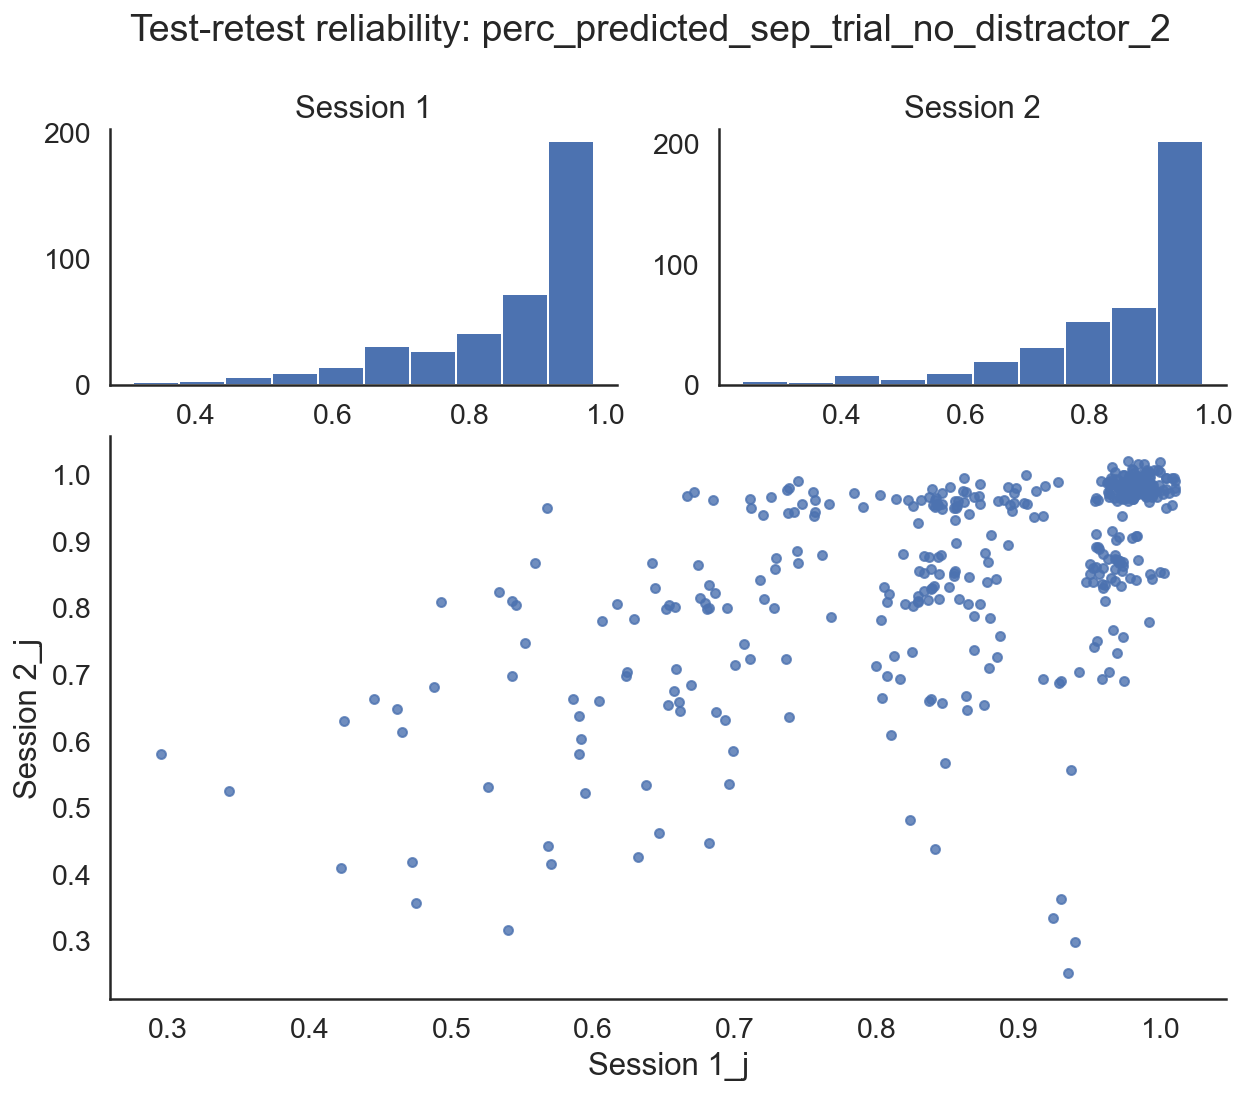

In [ ]:
iccs_perc_predicted_sep_trial_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_no_distractor_2', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_2 = get_model_calculated_icc(ms['no_distractor_2'])
iccs_perc_predicted_sep_trial_mod_no_distractor_2['icc']

0.5701776728670459

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.488,2.908,397.0,398.0,0.0,0.423,0.549,".49 (.42, .55)"
Single_random_raters,ICC2,0.490,2.939,397.0,397.0,0.0,0.424,0.550,".49 (.42, .55)"
Single_fixed_raters,ICC3,0.492,2.939,397.0,397.0,0.0,0.427,0.552,".49 (.43, .55)"
Average_raters_absolute,ICC1k,0.656,2.908,397.0,398.0,0.0,0.594,0.709,".66 (.59, .71)"
Average_random_raters,ICC2k,0.657,2.939,397.0,397.0,0.0,0.596,0.710,".66 (.60, .71)"
Average_fixed_raters,ICC3k,0.660,2.939,397.0,397.0,0.0,0.599,0.712,".66 (.60, .71)"


,variance,Percent
ID,0.010,0.490
Items,0.000,0.005
Residual,0.010,0.505
Total,0.019,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


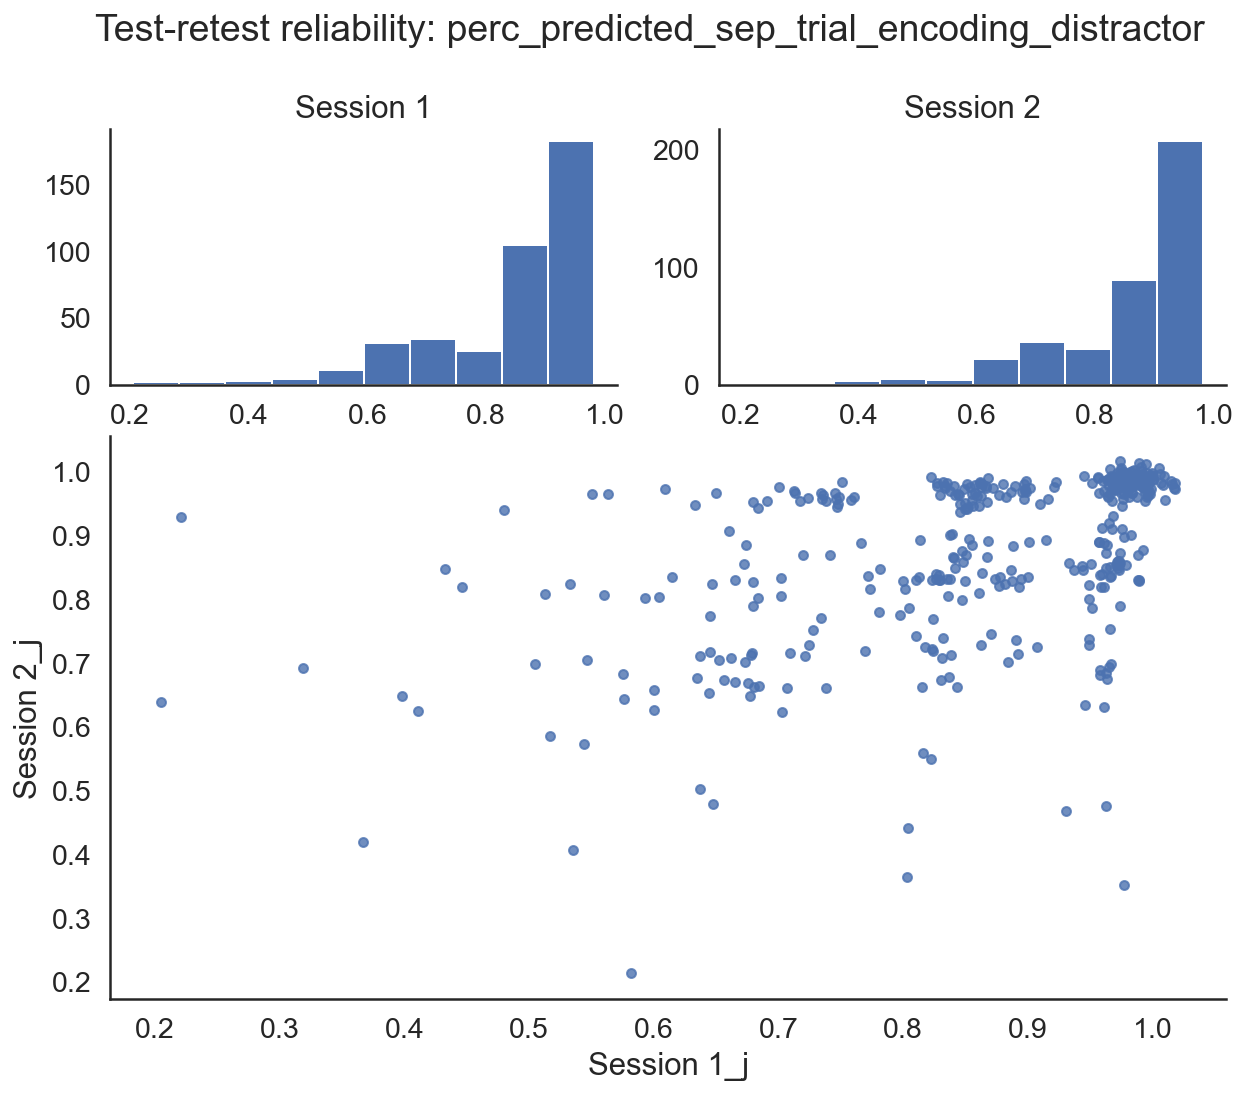

In [ ]:
perc_predicted_sep_trial_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_encoding_distractor', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_encoding_distractor = get_model_calculated_icc(ms['encoding_distractor'])
iccs_perc_predicted_sep_trial_mod_encoding_distractor['icc']

0.5078922188139144

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.644,4.626,397.0,398.0,0.0,0.594,0.690,".64 (.59, .69)"
Single_random_raters,ICC2,0.646,4.766,397.0,397.0,0.0,0.593,0.694,".65 (.59, .69)"
Single_fixed_raters,ICC3,0.653,4.766,397.0,397.0,0.0,0.603,0.698,".65 (.60, .70)"
Average_raters_absolute,ICC1k,0.784,4.626,397.0,398.0,0.0,0.745,0.817,".78 (.74, .82)"
Average_random_raters,ICC2k,0.785,4.766,397.0,397.0,0.0,0.745,0.819,".79 (.74, .82)"
Average_fixed_raters,ICC3k,0.790,4.766,397.0,397.0,0.0,0.752,0.822,".79 (.75, .82)"


,variance,Percent
ID,0.018,0.646
Items,0.000,0.010
Residual,0.009,0.343
Total,0.027,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


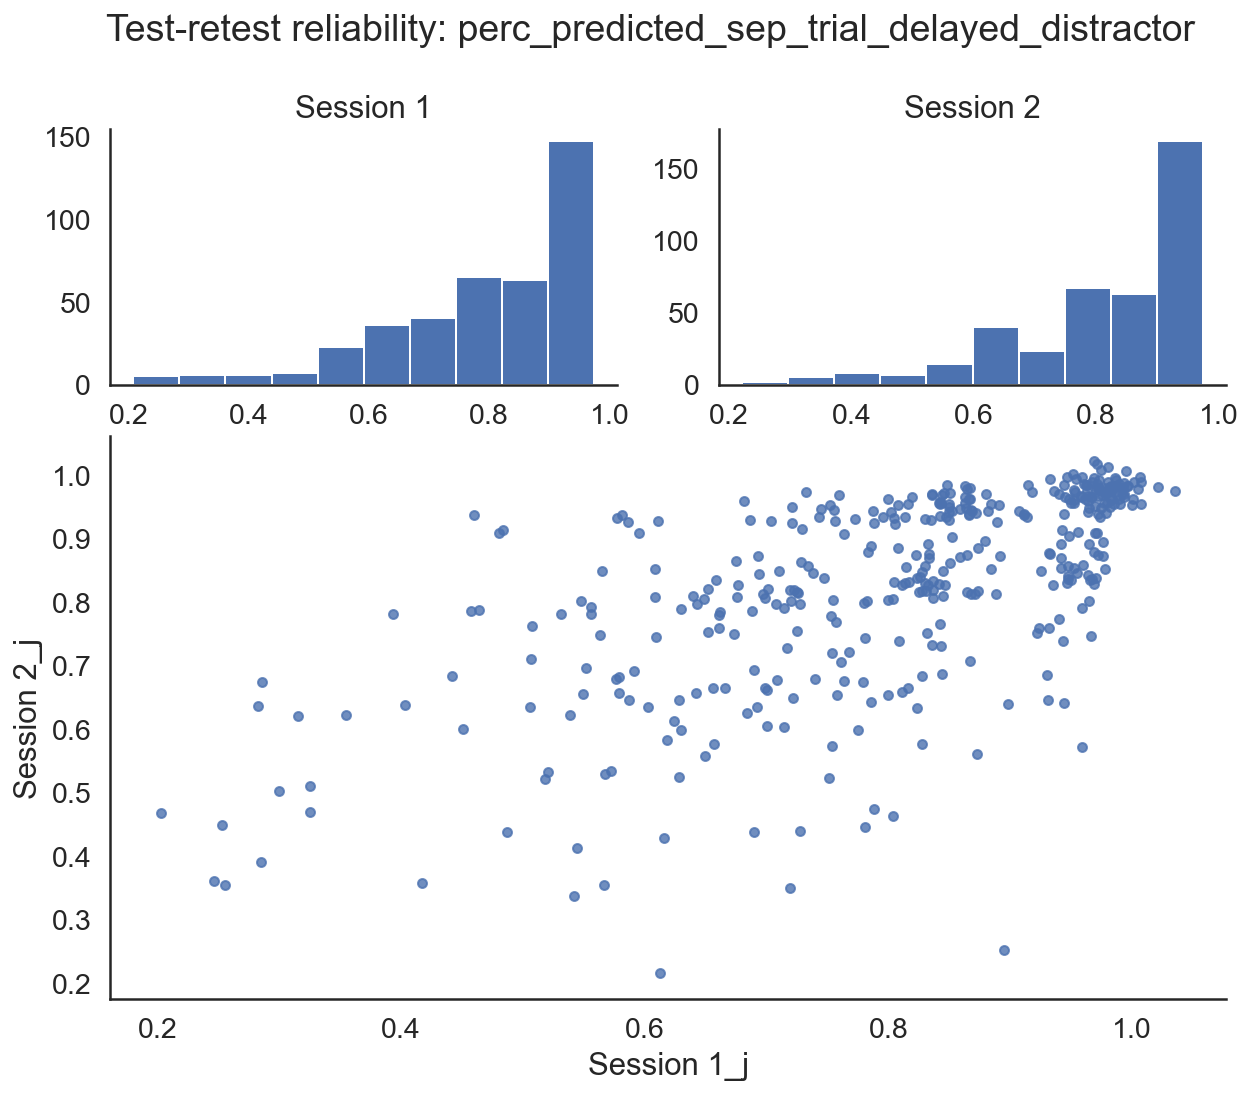

In [ ]:
perc_predicted_sep_trial_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_delayed_distractor', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_delayed_distractor = get_model_calculated_icc(ms['delayed_distractor'])
iccs_perc_predicted_sep_trial_mod_delayed_distractor['icc']

0.6282732689716823

### Based on model-calculated variances

#### No distractor (long)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_1 = stats.get_model_calculated_icc(ms['no_distractor_1'])
iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']

0.6449762145402308

#### No distractor (short)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_2 = stats.get_model_calculated_icc(ms['no_distractor_2'])
iccs_perc_predicted_sep_trial_mod_no_distractor_2['icc']

0.5902037818540795

#### Enconding distractor

In [ ]:
iccs_perc_predicted_sep_trial_mod_encoding_distractor = stats.get_model_calculated_icc(ms['encoding_distractor'])
iccs_perc_predicted_sep_trial_mod_encoding_distractor['icc']

0.507288731736981

#### Delayed distractor

In [ ]:
iccs_perc_predicted_sep_trial_mod_delayed_distractor = stats.get_model_calculated_icc(ms['delayed_distractor'])
iccs_perc_predicted_sep_trial_mod_delayed_distractor['icc']

0.6282732689716823

## Comparison of methods

### All methods

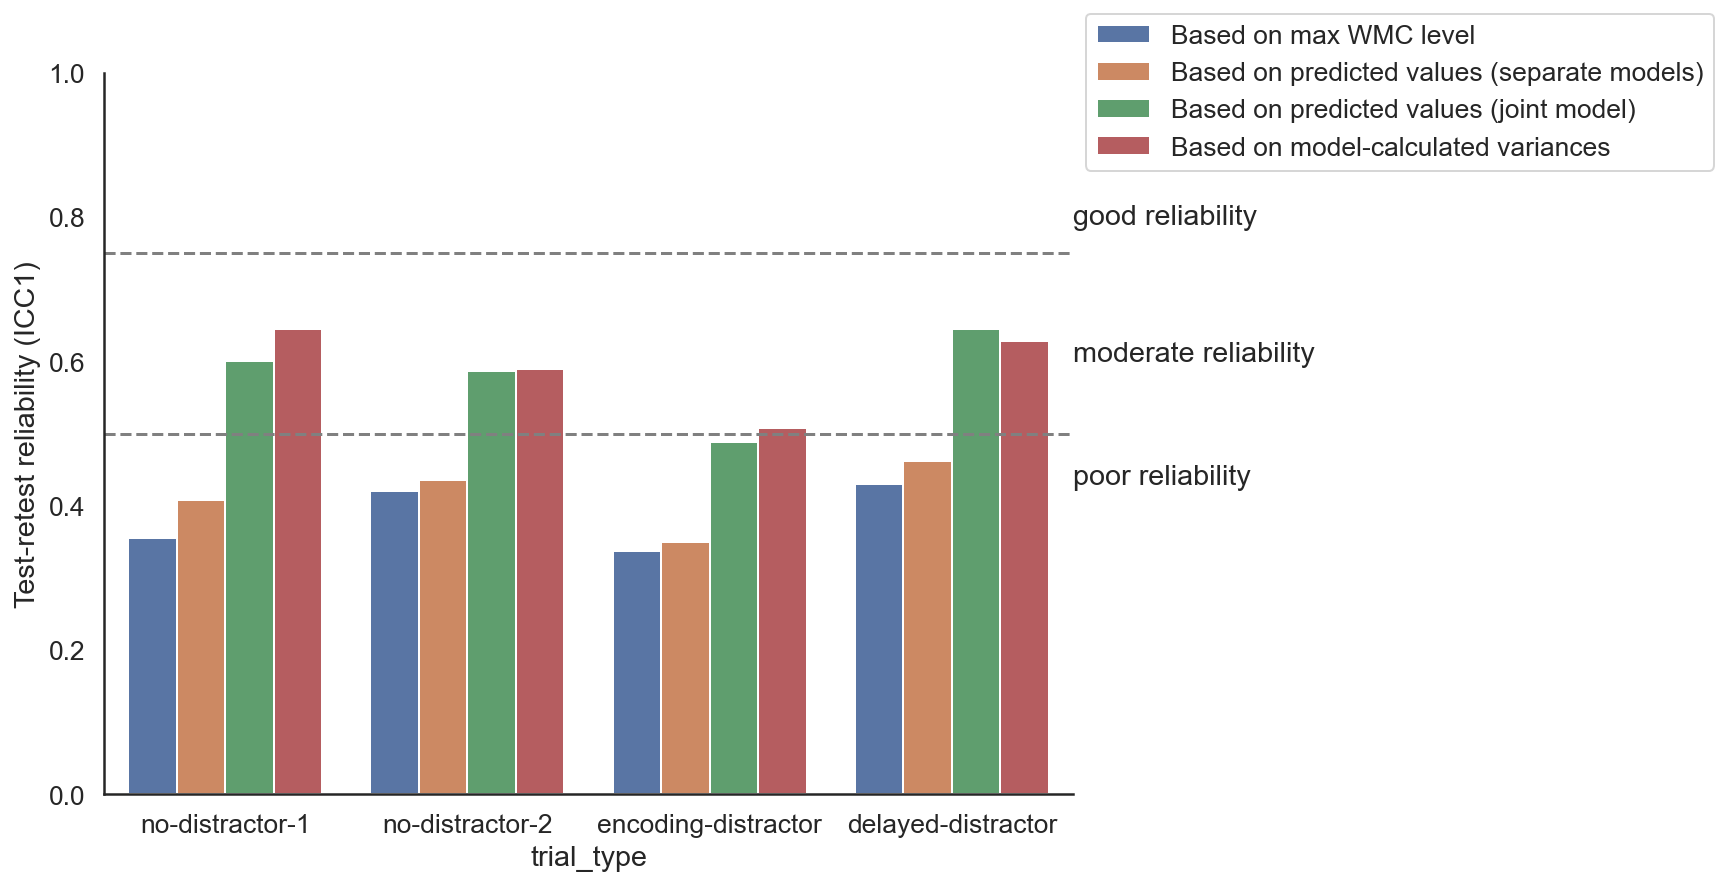

In [ ]:
iccs = {
    "Based on max WMC level_no-distractor-1": iccs_mean_no_distractor_1,
    "Based on max WMC level_no-distractor-2": iccs_mean_no_distractor_2,
    "Based on max WMC level_encoding-distractor": iccs_mean_encoding_distractor,
    "Based on max WMC level_delayed-distractor": iccs_mean_delayed_distractor,
    "trial_sep_no-distractor-1": iccs_perc_predicted_sep_no_distractor_1,
    "trial_sep_no-distractor-2": iccs_perc_predicted_sep_no_distractor_2,
    "trial_sep_encoding-distractor": perc_predicted_sep_encoding_distractor,
    "trial_sep_delayed-distractor": perc_predicted_sep_delayed_distractor,
    "trial_joint_no-distractor-1": iccs_perc_predicted_sep_trial_no_distractor_1,
    "trial_joint_no-distractor-2": iccs_perc_predicted_sep_trial_no_distractor_2,
    "trial_joint_encoding-distractor": perc_predicted_sep_trial_encoding_distractor,
    "trial_joint_delayed-distractor": perc_predicted_sep_trial_delayed_distractor,
    "model_calc_no-distractor-1": iccs_perc_predicted_sep_trial_mod_no_distractor_1,
    "model_calc_no-distractor-2": iccs_perc_predicted_sep_trial_mod_no_distractor_2,
    "model_calc_encoding-distractor": iccs_perc_predicted_sep_trial_mod_encoding_distractor,
    "model_calc_delayed-distractor": iccs_perc_predicted_sep_trial_mod_delayed_distractor  
}


g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 3.5, font_scale = 1.2)

### Selected methods for manuscript

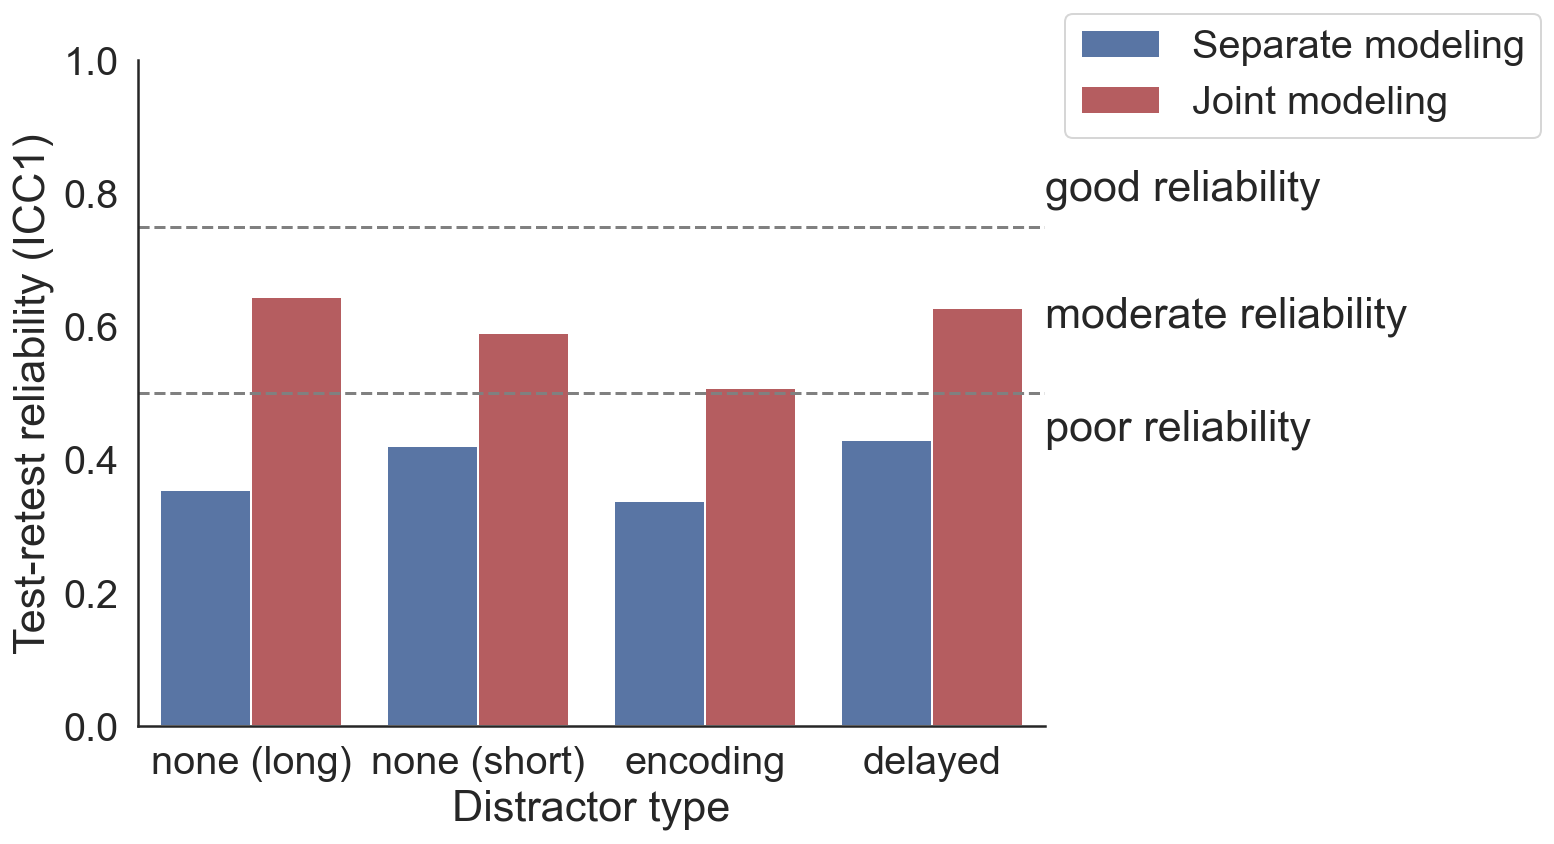

In [ ]:
iccs = {
    "Separate modeling_none (long)": iccs_mean_no_distractor_1,
    "Joint modeling_none (long)": iccs_perc_predicted_sep_trial_mod_no_distractor_1,
    "Separate modeling_none (short)": iccs_mean_no_distractor_2,
    "Joint modeling_none (short)": iccs_perc_predicted_sep_trial_mod_no_distractor_2,
    "Separate modeling_encoding": iccs_mean_encoding_distractor,
    "Joint modeling_encoding": iccs_perc_predicted_sep_trial_mod_encoding_distractor, 
    "Separate modeling_delayed": iccs_mean_delayed_distractor,
    "Joint modeling_delayed": iccs_perc_predicted_sep_trial_mod_delayed_distractor, 
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = 1.3,
                       qualitative_labels = True,
                       x_offset = 3.5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('Distractor type');


## Variance proportions

### No distractor (long)

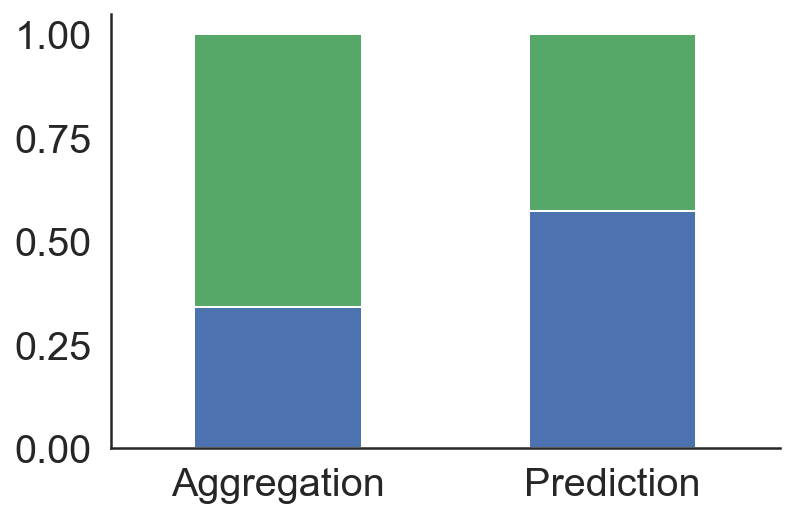

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_no_distractor_1,'Prediction':iccs_perc_predicted_sep_trial_no_distractor_1})
ax.get_legend().remove()

In [ ]:
def var_comp_plot_2(results):
    perc_variance = []
    for r in results.items():
        _df = r[1]['iccs'][1].T
        _df.columns = ['Participant','Session','Residual','Total']
        perc_variance.append(_df[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    display(df)
    df.iloc[1] = df.iloc[1]/df.iloc[0]
    df = (df-1)*100
    ax = df.iloc[1].plot(kind = 'bar', stacked = False, color = sns.color_palette()[:3])
    ax.grid(False)
    sns.despine()
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)
    ax.axhline(0, color = 'black')
    #ax.set_ylim([-100,100])
    return ax

,Participant,Session,Residual
Aggregation,0.342105,0.0,0.657895
Prediction,0.574411,0.0,0.425589


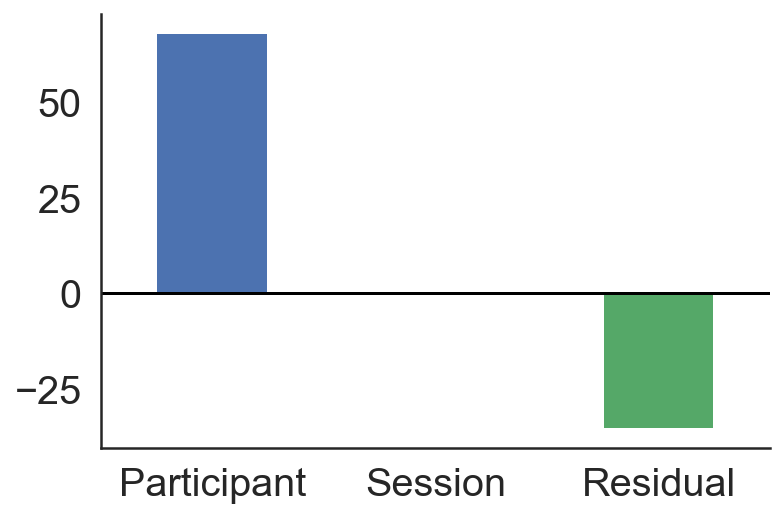

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_no_distractor_1,'Prediction':iccs_perc_predicted_sep_trial_no_distractor_1})
ax.get_legend().remove()

#### Why is there no session variance

### No distractor (short)

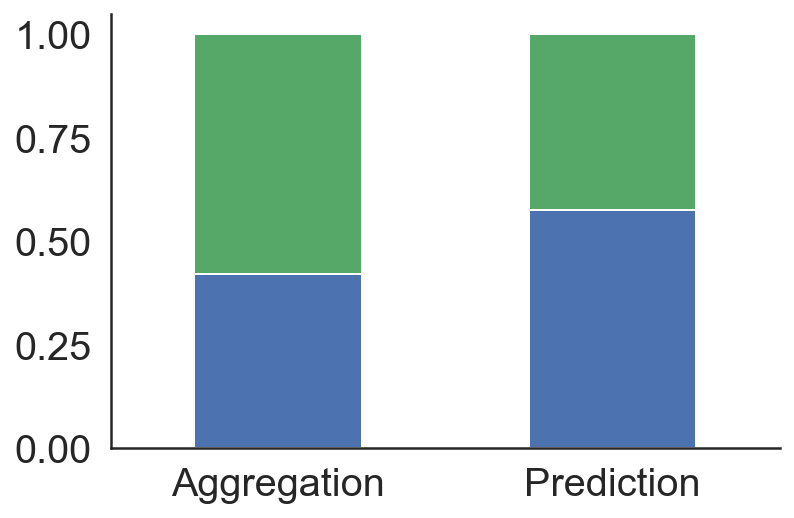

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_no_distractor_2,'Prediction':iccs_perc_predicted_sep_trial_no_distractor_2})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.421551,1.207571e-05,0.578437
Prediction,0.574474,6.246437e-11,0.425526


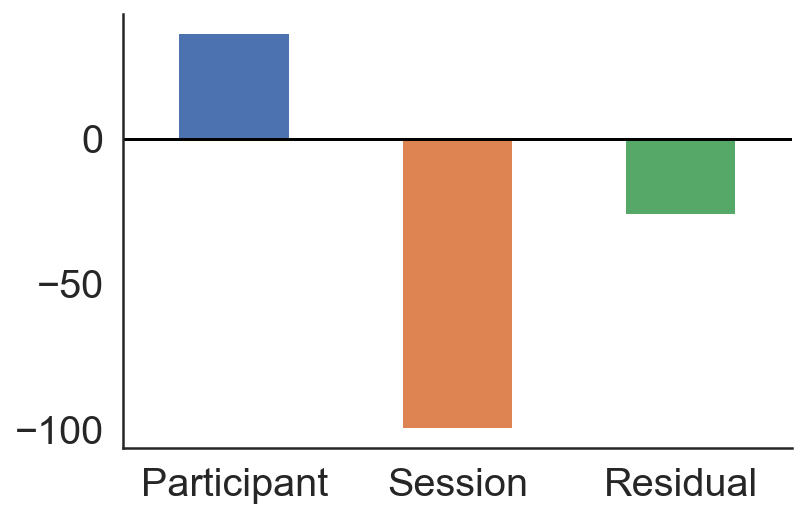

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_no_distractor_2,'Prediction':iccs_perc_predicted_sep_trial_no_distractor_2})
ax.get_legend().remove()

### Encoding distractor

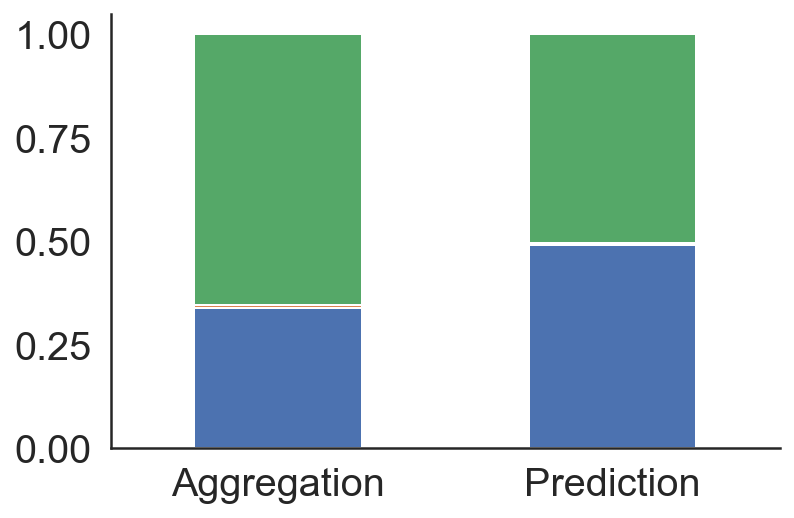

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_encoding_distractor,'Prediction':perc_predicted_sep_trial_encoding_distractor})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.338448,0.008127,0.653425
Prediction,0.490391,0.005352,0.504258


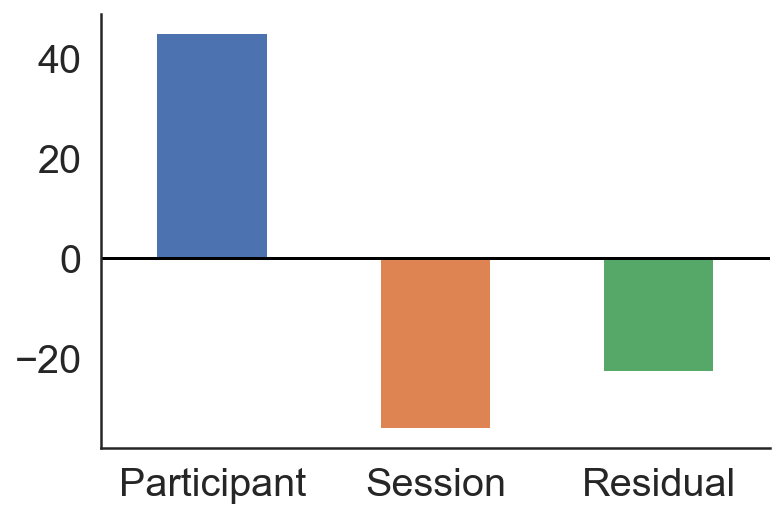

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_encoding_distractor,'Prediction':perc_predicted_sep_trial_encoding_distractor})
ax.get_legend().remove()

### Delayed distractor

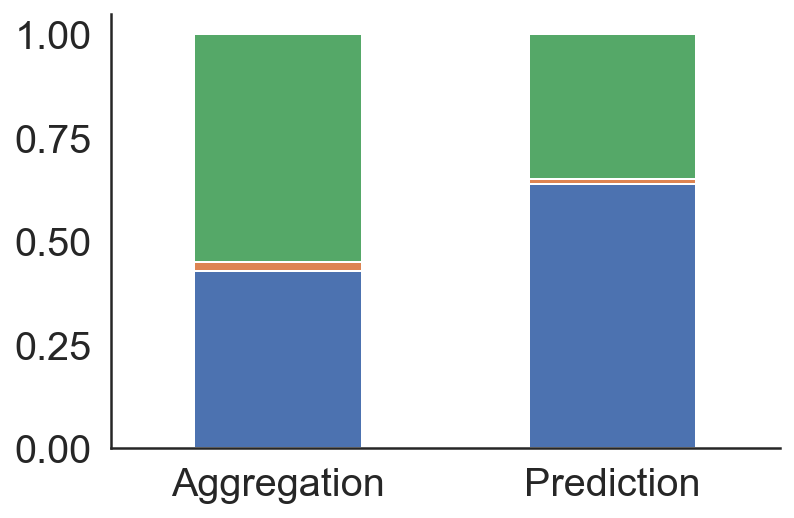

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_delayed_distractor,'Prediction':perc_predicted_sep_trial_delayed_distractor})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.429072,0.020687,0.550240
Prediction,0.638013,0.012994,0.348994


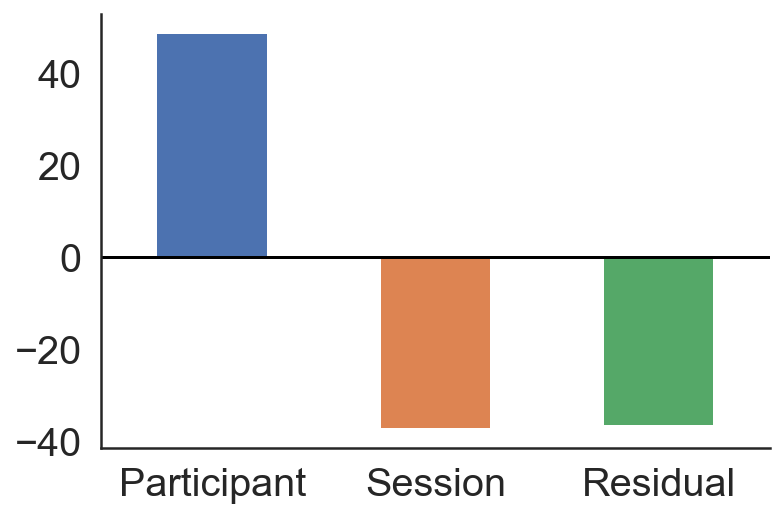

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_delayed_distractor,'Prediction':perc_predicted_sep_trial_delayed_distractor})
ax.get_legend().remove()

## Effect of time

In [ ]:
scores = stats.get_scores(dp, dp.get_wm_data, wm_scoring.get_perc_correct_predicted_sep_trial)

### No distractor (long)

In [ ]:
ax = plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_no_distractor_1")

NameError: name 'plot_time_effect_area' is not defined

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### No distractor (short)

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_no_distractor_2")

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### Encoding distractor

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_encoding_distractor")

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### Delayed distractor

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_delayed_distractor")

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

In [ ]:
stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor")

## Effect of time (percentage change)

### No distractor (long)

In [ ]:
stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = False)

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = True)

Note that these scores have 0 session variance in session one, which breaks the other calculations.

### No distractor (short)

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = False)

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = True)

### Encoding distractor

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = False)

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = True)

### Delayed distractor

In [ ]:
stats.plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_delayed_distractor")

In [ ]:
def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    df = get_time_effect(_df, sessions, dependent, scaling)
    if change:
        df = (df/df.iloc[0])*100
        ax = df[['participant','session','residual']].plot(legend = legend)
        ax.figure.legend(bbox_to_anchor=[1.4, 1])
    else:
        ax = df.plot(y="icc", legend=False, color = 'black',linestyle = '--')
        ax.set_ylabel('icc', color = 'black')
        ax2 = ax.twinx()
        df.plot(y="session", ax=ax2, legend=False, color = sns.color_palette()[1])
        ax2.set_ylabel('session',color = sns.color_palette()[1])
        ax3 = ax.twinx()
        ax3.set_ylabel('residual',color = sns.color_palette()[2])
        ax3.spines["right"].set_position(("axes", 1.3))
        df.plot(y="residual", ax=ax3, legend=False, color = sns.color_palette()[2])
        ax4 = ax.twinx()
        ax4.set_ylabel('participant',color = sns.color_palette()[0])
        df.plot(y="participant", ax=ax4, legend=False, color = sns.color_palette()[0])
        ax4.spines["right"].set_position(("axes", 1.6))
        sns.despine(right=False)
    ax.xaxis.get_major_locator().set_params(integer=True)
plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = False)

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = True)